In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/WILDFIRE/Database Not Kidding!/data.csv')
df

<ipython-input-3-2657b9b5dbb7>:1: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,26,27,36,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/WILDFIRE/Database Not Kidding!/data.csv')


,OBJECTID,Shape,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,...,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
0,1,b'\x00\x01\xad\x10\x00\x00\xc8\xce\n[_@^\xc0\x...,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,...,1730.0,0.10,A,40.036944,-121.005833,USFS,CA,63.0,6063.0,Plumas County
1,2,b'\x00\x01\xad\x10\x00\x00\xc8\xe594\xe2\x19^\...,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,1530.0,0.25,A,38.933056,-120.404444,USFS,CA,61.0,6061.0,Placer County
2,3,b'\x00\x01\xad\x10\x00\x00x{\xac \x13/^\xc0@\x...,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,2024.0,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,CA,17.0,6017.0,El Dorado County
3,4,b'\x00\x01\xad\x10\x00\x00\xc8\x13u\xd7s\xfa]\...,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,1400.0,0.10,A,38.559167,-119.913333,USFS,CA,3.0,6003.0,Alpine County
4,5,b'\x00\x01\xad\x10\x00\x00\xd0\x11y\xf8\xb6\xf...,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,1200.0,0.10,A,38.559167,-119.933056,USFS,CA,3.0,6003.0,Alpine County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2303561,2303562,b'\x00\x01\xad\x10\x00\x00\xcc\x9a\xedDh=[\xc0...,400732978,ICS209_2020_11710294,INTERAGCY,IA-ICS209,BLM,USCOGRD,Grand Junction Field Office,COGRD,...,NaN,1.00,B,39.037890,-108.959500,MISSING/NOT SPECIFIED,CO,NaN,NaN,NaN
2303562,2303563,b'\x00\x01\xad\x10\x00\x00\xe8\x11\xda\xda1\xe...,400732979,ICS209_2020_11781527,INTERAGCY,IA-ICS209,ST/C&L,USCAMMU,Merced-Mariposa Unit,CAMMU,...,NaN,100.00,D,37.148611,-119.503056,Private,CA,Madera,6039.0,Madera County
2303563,2303564,b'\x00\x01\xad\x10\x00\x00P\xf6\xa7\x9eV\x9c\\...,400732980,ICS209_2020_11815219,INTERAGCY,IA-ICS209,FS,USMTBRF,Bitterroot National Forest,MTBRF,...,NaN,50.00,C,46.151370,-114.442800,MISSING/NOT SPECIFIED,MT,NaN,NaN,NaN
2303564,2303565,b'\x00\x01\xad\x10\x00\x00\\\x87\xc8\xbbS\x07^...,400732982,ICS209_2020_11831809,INTERAGCY,IA-ICS209,FWS,USWAMCR,Mid Columbia National Wildlife Refuge Complex,WAMCR,...,1900.0,24892.00,G,46.670340,-120.114500,UNDEFINED FEDERAL,WA,Yakima,53077.0,Yakima County


In [10]:
df_notKidding = df[['FIRE_YEAR', 'DISCOVERY_DOY', 'DISCOVERY_TIME', 
                    'NWCG_CAUSE_CLASSIFICATION', 'NWCG_GENERAL_CAUSE', 
                    'CONT_DATE', 'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
                    'LONGITUDE', 'STATE']]
df_notKidding.head()          

,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_TIME,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE
0,2005,33,1300.0,Human,Power generation/transmission/distribution,2/2/2005,33.0,1730.0,0.10,A,40.036944,-121.005833,CA
1,2004,133,845.0,Natural,Natural,5/12/2004,133.0,1530.0,0.25,A,38.933056,-120.404444,CA
2,2004,152,1921.0,Human,Debris and open burning,5/31/2004,152.0,2024.0,0.10,A,38.984167,-120.735556,CA
3,2004,180,1600.0,Natural,Natural,7/3/2004,185.0,1400.0,0.10,A,38.559167,-119.913333,CA
4,2004,180,1600.0,Natural,Natural,7/3/2004,185.0,1200.0,0.10,A,38.559167,-119.933056,CA


In [11]:
df_notKidding.shape

(2303566, 13)

In [12]:
df_notKidding.isna().sum()

FIRE_YEAR                         0
DISCOVERY_DOY                     0
DISCOVERY_TIME               789095
NWCG_CAUSE_CLASSIFICATION         0
NWCG_GENERAL_CAUSE                0
CONT_DATE                    894813
CONT_DOY                     894813
CONT_TIME                    990880
FIRE_SIZE                         0
FIRE_SIZE_CLASS                   0
LATITUDE                          0
LONGITUDE                         0
STATE                             0
dtype: int64

In [13]:
df_temp = df_notKidding.dropna()

In [14]:
df_temp.shape  

(1276794, 13)

In [15]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [16]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth = 5):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for df_notKidding', fontsize=15)
    plt.show()

In [17]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

(array([205868., 208443., 254102., 231404., 162291., 305086., 265974.,
        211172., 241547., 217679.]),
 array([1992. , 1994.8, 1997.6, 2000.4, 2003.2, 2006. , 2008.8, 2011.6,
        2014.4, 2017.2, 2020. ]),
 <BarContainer object of 10 artists>)

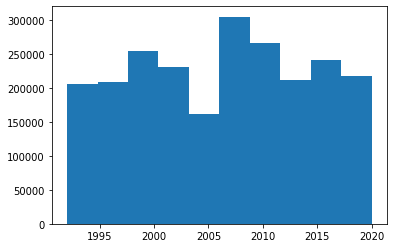

In [18]:
# plotPerColumnDistribution(df_notKidding[['FIRE_YEAR', 'LONGITUDE', 'LATITUDE']], 1, 3)

plt.hist(df_notKidding['FIRE_YEAR'])

<ipython-input-16-f70618422fa7>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN


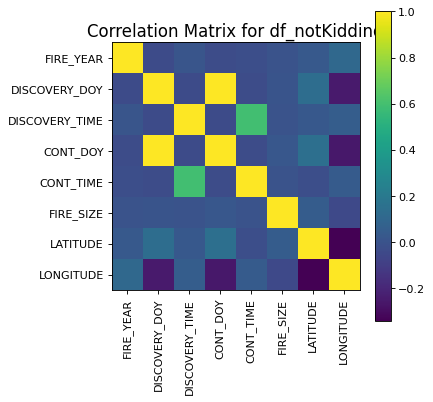

In [20]:
plotCorrelationMatrix(df_temp)